In [1]:
import keras

model = keras.saving.load_model("modello-passi.keras")
attivazioni = keras.Model(inputs=model.layers[0].output,outputs=model.layers[5].output)

2024-05-25 00:21:44.860902: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 00:21:44.863851: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 00:21:44.906254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 00:21:45.684018: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


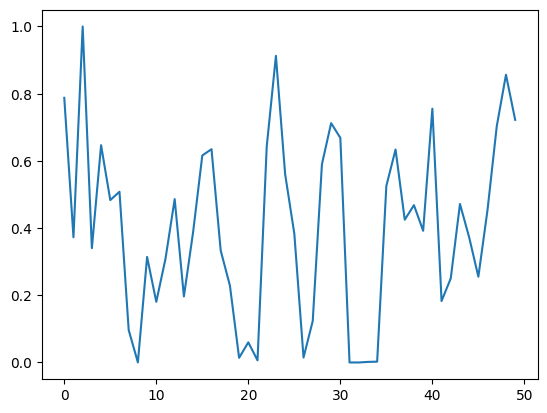

array([[[-2.19767354e-03,  1.10787610e-02,  7.81042576e-02,
          3.30700316e-02, -3.47727053e-02, -1.38720684e-02,
         -5.80828711e-02,  2.20627785e-02, -1.80769302e-02,
         -3.60111147e-02]],

       [[-2.25759614e-02,  4.90696542e-03, -6.56894594e-03,
          2.72480138e-02, -3.18239145e-02,  1.15720592e-02,
         -2.28116661e-01,  1.75974026e-01,  1.58218294e-02,
          1.81805007e-02]],

       [[ 2.11557001e-02, -1.31169818e-02,  1.14452094e-01,
          4.41394337e-02, -3.85537967e-02, -5.56353293e-03,
          3.87974828e-03, -1.17831826e-02, -2.57955790e-02,
         -5.82556203e-02]],

       [[-2.23322734e-02,  3.89016792e-03, -1.89925525e-02,
          3.10874581e-02, -3.01064290e-02,  2.10051555e-02,
         -2.52065539e-01,  1.94655761e-01,  2.38367319e-02,
          2.40897089e-02]],

       [[-8.19781050e-03,  1.91932414e-02,  5.83262034e-02,
          1.98829956e-02, -3.43238302e-02, -2.87459344e-02,
         -9.48367566e-02,  5.74546829e-02, -

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

steps=pd.read_csv("user-date-steps.csv")
window=50

for uuid,group in steps.groupby('uuid'):
    if len(group)<window:
        continue
    inp = group["value"].values[-window:].reshape(50,1)
    pred= attivazioni.predict(inp)
    plt.plot(inp, label='Truth')
    plt.show()
    plt.close()
    break
pred